# Data review

In [19]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [20]:
# Read data
df = pd.read_csv('../input/covid19s-impact-on-airport-traffic/covid_impact_on_airport_traffic.csv')
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


* AggregationMethod: Aggregation period used to compute this metric

* Date: Date Traffic volume measured, in format YYYY-MM-DD.

* Version: Version of this dataset

* AirportName: Name of airport

* PercentOfBaseline: Proportion of trips on this date as compared to Avg number of trips on the same day of week in baseline period i.e 1st February 2020 - 15th March 2020

* Centroid: Geography representing centroid of the Airport polygon

* City: City within which the Airport is located

* State: State within which the Airport is located

* ISO_3166_2: ISO-3166-2 code representing Country and Subdivision

* Country: Country within which the Airport is located

* Geography: Polygon of the Airport that is used to compute this metric

In [21]:
df.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


In [22]:
# Information about dataframe
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 12.3 MB


In [23]:
# All columns
df.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography'],
      dtype='object')

# Data preprocessing

In [24]:
# Rename all columns into lower case
df.rename(columns=lambda x: x.strip().lower(),inplace=True)

In [25]:
# Changing the date type from str to datetime
df['date'] = pd.to_datetime(df['date'])

In [26]:
# Add "weekday" column and parsing data to it
days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:"Friday",5:'Saturday',6:'Sunday'}
df['weekday']=df['date'].apply(lambda x:days.get(x.weekday()))


df['month'] = pd.DatetimeIndex(df['date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [27]:
df.isna().sum()

aggregationmethod    0
date                 0
version              0
airportname          0
percentofbaseline    0
centroid             0
city                 0
state                0
iso_3166_2           0
country              0
geography            0
weekday              0
month                0
dtype: int64

**We can note that there is no missing data, so there is no need to restore**

In [28]:
df.head()

,aggregationmethod,date,version,airportname,percentofbaseline,centroid,city,state,iso_3166_2,country,geography,weekday,month
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Friday,Apr
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Monday,Apr
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Friday,Jul
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wednesday,Sep
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Saturday,Oct


In [29]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   aggregationmethod  7247 non-null   object        
 1   date               7247 non-null   datetime64[ns]
 2   version            7247 non-null   float64       
 3   airportname        7247 non-null   object        
 4   percentofbaseline  7247 non-null   int64         
 5   centroid           7247 non-null   object        
 6   city               7247 non-null   object        
 7   state              7247 non-null   object        
 8   iso_3166_2         7247 non-null   object        
 9   country            7247 non-null   object        
 10  geography          7247 non-null   object        
 11  weekday            7247 non-null   object        
 12  month              7247 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory u

# Data visualization

Text(0.5, 1.0, 'Records for each country')

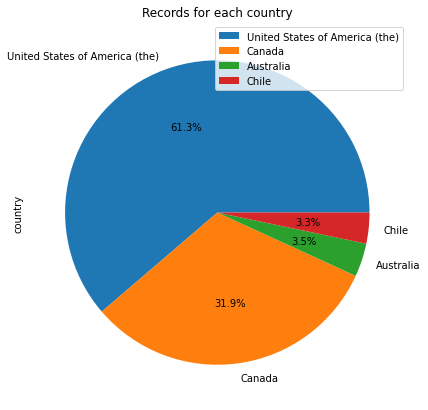

In [30]:
df_Country_count = pd.DataFrame(df["country"].value_counts())

g = df_Country_count.plot.pie(y='country', autopct='%1.1f%%', figsize=(7, 7))
g.set_title("Records for each country")

**We can note that of all the flights 61% and 31% belong to America and Canada**

Text(0.5, 1.0, 'records for each weekday')

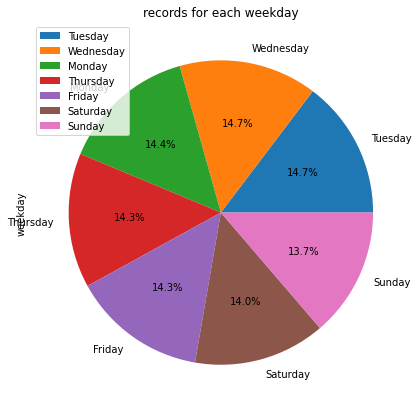

In [31]:
df_weekday_count = pd.DataFrame(df["weekday"].value_counts())
g = df_weekday_count.plot.pie(y='weekday', autopct='%1.1f%%', figsize=(7, 7))
g.set_title("records for each weekday")

**We can notice that on weekends people fly less and consequently there are few flights**

Text(0.5, 1.0, 'records for each airport')

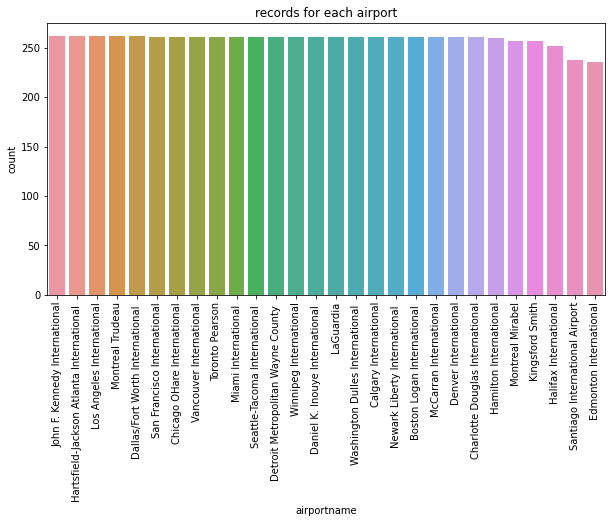

In [32]:
plt.figure(figsize=(10, 5))
g = sns.countplot(data=df, x="airportname",
              order = df['airportname'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each airport")

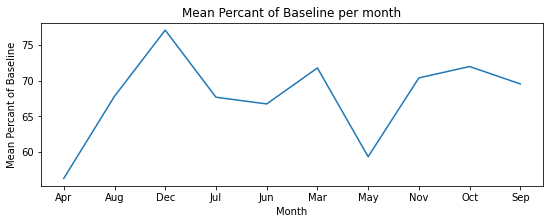

In [33]:
mean_percentofbaseline = df.groupby(['month'])['percentofbaseline'].mean()
month = ('Apr', 'Aug', 'Dec', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep')

plt.figure(figsize=(9, 3))
plt.plot(month, mean_percentofbaseline)
plt.title('Mean Percant of Baseline per month')
plt.xlabel('Month')
plt.ylabel('Mean Percant of Baseline')
plt.show()

**Here we can see how the Percant of Baseline dropped during the first coronavirus outbreak because a quarantine was declared. And the second outbreak worldwide occurred closer to May, and just in May we are seeing a decrease in air travel**

In [34]:
import folium
from folium.plugins import MarkerCluster

df['long'] = df['centroid'].apply(lambda x: x[6:-1].split(' ')[0])
df['lat'] = df['centroid'].apply(lambda x: x[6:-1].split(' ')[1])
df.drop(columns=['centroid'], axis=1)

world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(df)- 5000):
    folium.CircleMarker(location=[df.iloc[i]['lat'], df.iloc[i]['long']], radius=5,
                        fill=True).add_to(marker_cluster)
    
world_map